# 1 - Read the raw CSV
loading the dataset and take a first look.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv('Iris.csv')

# displaying first 5 rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#  2 - Check and drop missing values
check to see if there are any missing values in dataset and clean them.

In [3]:
# Check ano missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

df_clean = df.dropna()

print(f"\nOriginal rows: {len(df)}")
print(f"After cleaning: {len(df_clean)}")

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total missing values: 0

Original rows: 150
After cleaning: 150


# 3 - Fix data types
check and fix the data types to see if its properly formatted.

In [4]:
# current data types
print("Current data types:")
print(df_clean.dtypes)

column_to_fix = 'SepalLengthCm'

if column_to_fix in df_clean.columns:
    df_clean[column_to_fix] = pd.to_numeric(df_clean[column_to_fix], errors='coerce')
    print(f"Converted {column_to_fix} to numeric")
else:
    # Fallback: try to convert the first object column
    object_cols = df_clean.select_dtypes(include='object').columns
    if len(object_cols) > 0:
        col_name = object_cols[0]
        df_clean[col_name] = pd.to_numeric(df_clean[col_name], errors='coerce')
        print(f"Converted {col_name} to numeric")

print("\nAfter type conversion:")
print(df_clean.dtypes)

Current data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Converted SepalLengthCm to numeric

After type conversion:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


#  4 - Adding 1 derived column
creating a new column based on existing data.

In [8]:
# Create derived column
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
col1='SepalLengthCm'
col2='SepalWidthCm'
if len(numeric_cols) >= 2:
    # Auto-select first two numeric columns
    col1, col2 = numeric_cols[0], numeric_cols[1]


    df_clean['sepal_area'] = df_clean[col1] + df_clean[col2]
    print(f"Created 'total_score' from {col1} + {col2}")

    print(f"Sample values: {col1}={df_clean[col1].iloc[0]}, {col2}={df_clean[col2].iloc[0]}, total={df_clean['sepal_area'].iloc[0]}")

else:

    first_numeric = numeric_cols[0] if len(numeric_cols) > 0 else df_clean.columns[0]
    median_val = df_clean[first_numeric].median()
    df_clean['category'] = df_clean[first_numeric].apply(lambda x: 'High' if x > median_val else 'Low')
    print(f"Created 'category' column based on {first_numeric}")

# display new colmn
df_clean.head()

Created 'total_score' from Id + SepalLengthCm
Sample values: Id=1, SepalLengthCm=5.1, total=6.1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_area
0,1,5.1,3.5,1.4,0.2,Iris-setosa,6.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,6.9
2,3,4.7,3.2,1.3,0.2,Iris-setosa,7.7
3,4,4.6,3.1,1.5,0.2,Iris-setosa,8.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,10.0


# 5 - Visualize a key pattern
chart to understand data better.

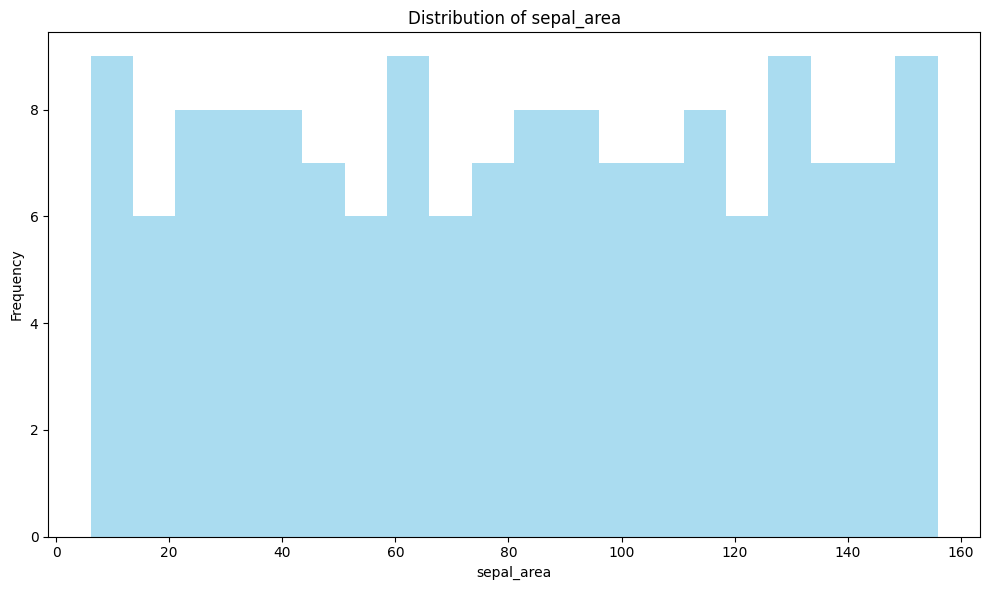

Chart saved as 'data_visualization.png'


<Figure size 640x480 with 0 Axes>

In [9]:
# visualization
plt.figure(figsize=(10, 6))

numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

col_to_plot = 'sepal_area'

if col_to_plot in df_clean.select_dtypes(include=['int64', 'float64']).columns:
    plt.hist(df_clean[col_to_plot], bins=20, alpha=0.7, color='skyblue')
    plt.title(f'Distribution of {col_to_plot}')
    plt.xlabel(col_to_plot)
    plt.ylabel('Frequency')
else:

    df_clean[col_to_plot].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Count of {col_to_plot}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
print("Chart saved as 'data_visualization.png'")

# - Saved cleaned outputs
save cleaned dataset and visualization.

In [10]:
clean_filename = 'iris_clean.csv'
chart_filename = 'sepal_area_histogram.png'

df_clean.to_csv(clean_filename, index=False)
print(f"Cleaned data saved as '{clean_filename}'")

# Summary of what we accomplished
print(f"\nSUMMARY:")
print(f"- Original dataset: {len(df)} rows")
print(f"- Cleaned dataset: {len(df_clean)} rows")
print(f"- Columns: {len(df_clean.columns)}")
print(f"- Files created: {clean_filename}, {chart_filename}")

Cleaned data saved as 'iris_clean.csv'

SUMMARY:
- Original dataset: 150 rows
- Cleaned dataset: 150 rows
- Columns: 7
- Files created: iris_clean.csv, sepal_area_histogram.png
